In [3]:
import pandas as pd 
import numpy as np 

In [28]:
df = pd.read_csv('master_tickets.csv')
df.head()

,fiscal_year,acct_id,is_college_pass,event_name,event_date,add_datetime,days_before_event,section_name,row_name,seat_num,...,paid_amount,comp,comp_name,source,ticket_type,age,gender,marital_status,education,zip
0,FY23,8362049,False,230922SE,NaN,2022-07-15,NaN,BALCL,A,4,...,68.0,N,Not Comp,online,Subscription,58.0,Male,Single,NaN,30041
1,FY23,8449640,False,230922SE,NaN,2022-09-14,NaN,BALCL,B,1,...,46.0,N,Not Comp,ASO Staff,Subscription,80.0,Male,Married,Graduate School,30316
2,FY23,4061365,False,230922SE,NaN,2022-07-27,NaN,BALCL,B,4,...,68.0,N,Not Comp,online,Subscription,58.0,Female,Single,College,30308
3,FY23,354115,False,230922SE,NaN,2022-04-05,NaN,BALCL,C,1,...,60.0,N,Not Comp,ASO Staff,Subscription,72.0,Male,Married,College,30087
4,FY23,8908470,False,230922SE,NaN,2022-09-20,NaN,BALCL,C,3,...,60.0,N,Not Comp,online,Single Ticket,24.0,Male,Inferred Single,High School,30253


In [56]:
# for first year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered = df23[df23['price_code_type'].str.startswith('Fixed Freshman Subscription', na=False)]
freshman23 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
print('Freshman Subscribers in FY23: ' + str(freshman23))

# for second year subscribers in FY24 - to compare with first year subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered = df24[df24['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore24 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
print('Sophomore Subscribers in FY24: ' + str(sophomore24))

print('Rate of coming back from Freshman in FY23 to Sophomore in FY24: ' + str(sophomore24 / freshman23 * 100))

Freshman Subscribers in FY23: 2300
Sophomore Subscribers in FY24: 1024
Rate of coming back from Freshman in FY23 to Sophomore in FY24: 44.52173913043478


In [57]:
# for 2 year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered = df23[df23['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore23 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
sophomore23

1015

In [58]:
# for three+ year subscribers in FY24 - to compare with second year subscribers in FY23
# I'm not sure if you can compare with just second year subscribers, since it's 3+ years but
df24 = df[df['fiscal_year'] =='FY24']
filtered = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
established24 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
established24

8410

In [59]:
# count of CYO subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
CYO23 = df23[df23['price_code_type'] == 'CYO Subscription']['ticket_type'].count()
print('CYO Subscribers in FY23: ' + str(CYO23))

# for upgraded subscribers in FY24 - to compare with CYO subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered = df24[df24['price_code_type'].str.startswith('Fixed Upgrade Subscription', na=False)]
upgrade24 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
print('Upgraded subscriptions in FY24: ' + str(upgrade24))

print('Rate of coming back from CYO in FY23 to Upgraded in FY24: ' + str(upgrade24 / CYO23 * 100))

CYO Subscribers in FY23: 2537
Upgraded subscriptions in FY24: 446
Rate of coming back from CYO in FY23 to Upgraded in FY24: 17.57981868348443


In [64]:
# Main characteristics of the people who just became Established in 2024, (age, educ, average number of attendance) 
df_establish = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
df_establish['age'].describe()

count    8135.000000
mean       67.209588
std        15.940083
min        20.000000
25%        56.000000
50%        70.000000
75%        78.000000
max        99.000000
Name: age, dtype: float64

In [76]:
import matplotlib.pyplot as plt

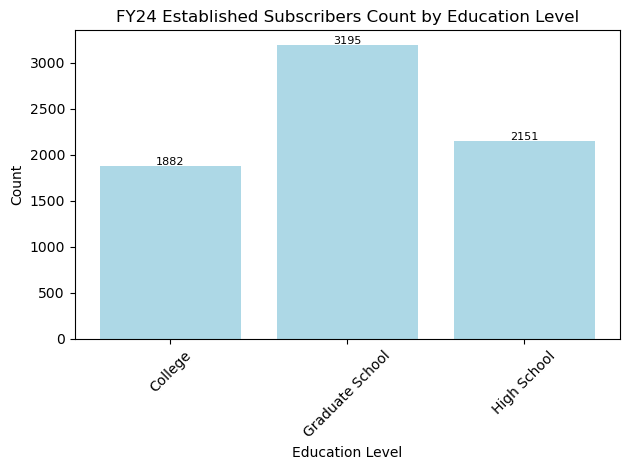

In [ ]:
edu_counts = df_establish.groupby('education')['ticket_type'].count()
# switch the order of education types
plt.bar(edu_counts.index, edu_counts.values, color='lightblue')
plt.title('FY24 Established Subscribers Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
#plt.xticks([0, 1, 2], ['High School', 'College', 'Graduate School'])
for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=8)

plt.tight_layout()
plt.show()

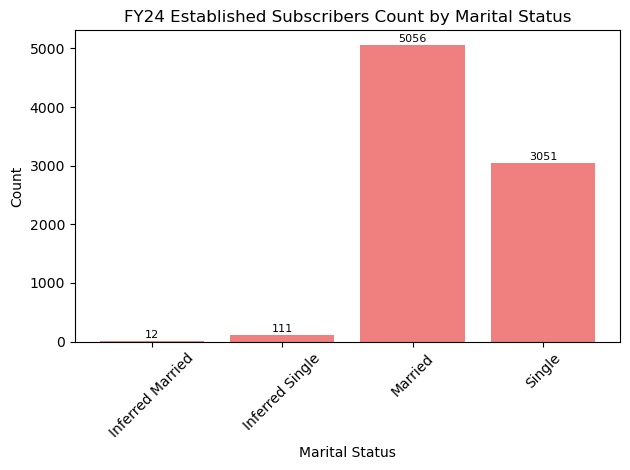

In [ ]:
marital_counts = df_establish.groupby('marital_status')['ticket_type'].count()
# switch the order of marital status types
plt.bar(marital_counts.index, marital_counts.values, color='lightcoral')
plt.title('FY24 Established Subscribers Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
#plt.xticks([0, 1, 2, 3], ['Inferred Single', 'Inferred Married', 'Single', 'Married'])

for i, value in enumerate(marital_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

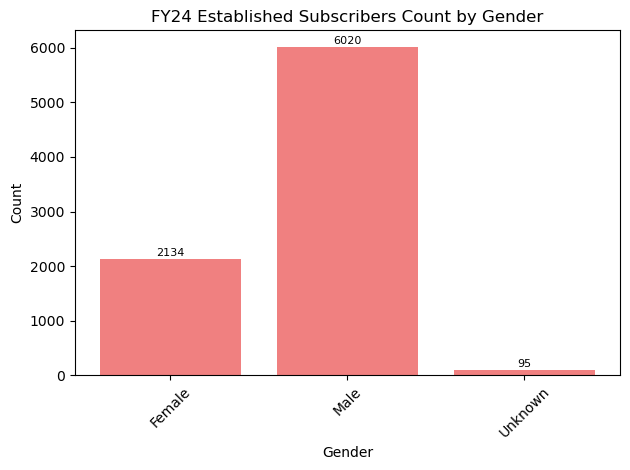

In [105]:
gender_counts = df_establish.groupby('gender')['ticket_type'].count()

plt.bar(gender_counts.index, gender_counts.values, color='lightcoral')
plt.title('FY24 Established Subscribers Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()